In [1]:
from General import functies as functies
from General import classes as classes
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [2]:
#das 1D-Model
fitparameters = ['phi', 'A', 'C_0', 'omega', 'q']
q = sp.symbols('q')
#met het vorige model
#fitparamdict = {'m1-1': [[-1.0689273830609691, -0.00035, 'S'], [0.11915482565570268, 3.2e-05, 'S'], [-486.28625801149684, -0.048, 'S'], [3.8141064794778394, (2.0, 6.1e-05), 'S'], [7.295393360058406e-09, 9.6e-13, 'S']], 'm1-2': [[3.085462516345724, 0.00058, 'S'], [0.08841055376867005, 4.4e-05, 'S'], [-504.6090451372339, -0.049, 'S'], [3.8175666008290845, (-0.0001, 0.77), 'S'], [6.5396664925246684e-09, 1e-12, 'S']], 'm1-3': [[-3.1937632911730818, -0.00062, 'S'], [0.0832399144484069, 4.5e-05, 'S'], [-434.81698875095157, -0.048, 'S'], [3.815809999380435, 0.79, 'S'], [6.524645471849267e-09, 1e-12, 'S']], 'm2-1': [[0.07609489573295163, 0.00051, 'S'], [0.12501601311761756, 4.8e-05, 'S'], [-213.94998816331463, -0.053, 'S'], [3.8070174550564078, 4.0, 'S'], [5.161871400177434e-09, 1e-12, 'S']], 'm2-2': [[0.9929838995696354, (0.00064, 0.00028), 'S'], [0.13510201665457458, (3.7e-06, 0.00046), 'S'], [-192.71809076348626, (-0.34, -0.0081), 'S'], [3.810282238815174, 3.3, 'S'], [5.6039150218628595e-09, (1e-13, 9.6e-12), 'S']], 'm2-3': [[-2.385402254415131, -0.0014, 'S'], [0.048854385287558505, 6.2e-05, 'S'], [-214.4837731890344, -0.048, 'S'], [3.816369997420442, (1.9, 0.00023), 'S'], [5.435208115207682e-09, 1.1e-12, 'S']], 'm3-1': [[-4.246894101151776, (-0.0033, -0.00072), 'S'], [0.09990616094496357, (5.4e-05, 0.00028), 'S'], [-224.9582913702644, (-0.067, -0.035), 'S'], [3.816288543054232, (-42.0, 2.0), 'S'], [2.1444540463113097e-09, (5.8e-13, 1.8e-12), 'S']], 'm3-2': [[2.2617459219758542, 0.0015, 'S'], [0.1152323509474002, 0.00013, 'S'], [-246.36914812581136, -0.068, 'S'], [3.8131575915834075, (4.1, 2.0), 'S'], [2.591361856751063e-09, 1.4e-12, 'S']], 'm3-3': [[-1.2091115539111228, -0.0018, 'S'], [0.08225185052424794, 0.00013, 'S'], [-220.32135459371273, -0.048, 'S'], [3.8134900558853992, (2.0, 3.9), 'S'], [2.2412612749045444e-09, 1e-12, 'S']], 'm5-1': [[-1.794812888595295, (-0.011, -2.6e-05), 'S'], [0.06982903307669214, (3.8e-06, 0.00027), 'S'], [-278.4189062996526, (-0.0097, -0.24), 'S'], [3.8156146084563867, 4.0, 'S'], [9.540852303932592e-09, (2.8e-12, 4.2e-13), 'S']], 'm5-2': [[0.2903010793019834, 0.00084, 'S'], [0.08780959112166975, 6.3e-05, 'S'], [74.97693225445607, 0.048, 'S'], [3.812334945422661, (2.8, 0.77), 'S'], [4.559498905172977e-09, 1e-12, 'S']], 'm6-1': [[-4.185429463545462, -0.00056, 'S'], [0.09997635223219647, 4.4e-05, 'S'], [83.09350698893203, 0.054, 'S'], [3.8107772291935476, (-11.0, 3.3), 'S'], [6.085533609110799e-09, 1.1e-12, 'S']], 'm6-2': [[-2.206087284941422, -0.00043, 'S'], [0.12711786124331836, 3.9e-05, 'S'], [107.53125955928627, 0.053, 'S'], [4.476646377753726, (2.2, 4.4), 'S'], [5.543990658271674e-09, 9.6e-13, 'S']], 'm6-3': [[-0.3892079281454425, -0.00062, 'S'], [0.10506392756272154, 5.1e-05, 'S'], [90.69101611471169, 0.063, 'S'], [5.079698843418701, (2.7, -0.00018), 'S'], [6.0382167220000244e-09, 1.2e-12, 'S']]}
#met het gereduceerde x_0-model:
fitparamdict = {'m1-1': [[-1.0591973775441228, 0.0020056171120131578, 'S'], [0.109518903942109, 0.0005375223111283924, 'Normaal'], [-522.2492143895824, 0.43019646674513723, 'S'], [3.810252048441806, 3.600000001125, 'S'], [8.16392536381126e-09, 5.620789983718521e-11, 'Normaal']], 'm1-2': [[-0.056873116623286694, 0.002322154172315008, 'S'], [-0.09516181991784649, -0.0005231770731133914, 'Normaal'], [-489.29048205397726, 0.12961867149450346, 'S'], [3.8181917077959318, 1.800000230027763, 'S'], [6.052521802285518e-09, 4.186708670941343e-11, 'Normaal']], 'm1-3': [[-3.191830760714013, 0.005302725714196426, 'S'], [0.053866449985915124, 0.0002800349743694894, 'Normaal'], [-603.4840623796842, 0.6700551917566194, 'S'], [3.8156393319791757, 1.80000001225, 'S'], [1.0577061238993961e-08, 7.454670889548658e-11, 'Normaal']], 'm2-1': [[0.06808675030561971, 0.0017066048165876012, 'S'], [0.12946633833492596, 0.0008075268065432594, 'Normaal'], [-203.58732705872234, 0.3800701119530448, 'S'], [3.8085072976266874, 4.0, 'S'], [4.906166917166121e-09, 3.3770574022947824e-11, 'Normaal']], 'm2-2': [[1.0000054408167904, 0.000951262319236918, 'S'], [0.13679128634053325, 0.000991880148075054, 'Normaal'], [-188.50271082442285, 0.21040199618824912, 'S'], [3.8091407923045173, 3.3, 'S'], [5.4981012433538534e-09, 3.9530229365542475e-11, 'Normaal']], 'm2-3': [[-2.38641109958984, -0.0012, 'S'], [0.05305637835599794, 0.00028039903196228365, 'Normaal'], [-195.79144515352678, 0.07430343195303969, 'S'], [3.8165297977035024, 7.400000005297297, 'S'], [4.987003885907707e-09, 3.432239363704009e-11, 'Normaal']], 'm3-1': [[1.7940883171078161, 0.0640000118828114, 'S'], [0.027963522792734154, 0.001021089475193448, 'Normaal'], [-484.4112857532795, 0.22027482833950865, 'S'], [3.859659924986543, 4.833218389437829, 'S'], [8.371516782921637e-09, 5.760700824982249e-11, 'Normaal']], 'm3-2': [[2.150922065747518, 0.0024596747752497687, 'S'], [0.03913452948154028, 0.00020909230585753838, 'Normaal'], [-488.6416313621658, 0.1722904524342542, 'S'], [3.8277091801946583, 2.1, 'S'], [8.465521711172782e-09, 5.824993346107007e-11, 'Normaal']], 'm3-3': [[-1.202495115476646, -0.0018, 'S'], [0.0490358906325901, 0.00029872868902461905, 'Normaal'], [-289.27613333432, 0.07392563831310488, 'S'], [3.8120135492993388, 4.382921400162226, 'S'], [3.909018948175633e-09, 2.6938358389127637e-11, 'Normaal']], 'm5-1': [[1.322831585492837, 0.01100003072722981, 'S'], [-0.058126169396603894, -0.0010064728727998578, 'Normaal'], [-360.9383970289935, 0.5800144911982803, 'S'], [3.8203332180129137, 4.338202392696772, 'S'], [1.1541315645190965e-08, 7.9603392979256e-11, 'Normaal']], 'm5-2': [[0.278702075820106, 0.0050022494939776846, 'S'], [0.036096751765020224, 0.0003667136590047985, 'Normaal'], [-225.74443520035342, 0.23021728866442678, 'S'], [3.814845121794483, 4.332435804486894, 'S'], [1.1790262647972632e-08, 8.143174060508658e-11, 'Normaal']], 'm6-1': [[2.1188886156190496, 0.000840535543567314, 'S'], [0.11033033306806708, 0.0005551435639252959, 'Normaal'], [110.29413226627425, 0.0810246875958186, 'S'], [3.8077987588747852, 3.4000000017794116, 'S'], [5.437911034010697e-09, 3.837825035473433e-11, 'Normaal']], 'm6-2': [[0.9337518485924422, 0.0016044936896105263, 'S'], [-0.12843054164205386, -0.0009621065151411317, 'Normaal'], [111.72586338097541, 0.2502418829852429, 'S'], [4.476837688581981, 4.919349550499538, 'S'], [5.443395759563868e-09, 4.0014623464593693e-11, 'Normaal']], 'm6-3': [[-0.38783944792555664, 0.0009069729874698585, 'S'], [0.10541550489458401, 0.0010804615016772174, 'Normaal'], [93.33059214548244, 0.24053274205396652, 'S'], [5.079315172543585, 2.700000001155741, 'S'], [5.977481399784963e-09, 4.3676545400740224e-11, 'Normaal']]}
#met stepsize 10**-6:
fitparamdict = {'m1-1': [[-1.0591973775441228, 0.00015, 'S'], [0.109518903942109, 0.0005341855435715275, 'Normaal'], [-522.2492143895824, 0.43, 'S'], [3.810252048441806, 9.1e-05, 'S'], [8.16392536381126e-09, 2.383235895880075e-10, 'Normaal']], 'm1-2': [[-0.056873116623286694, 0.0023, 'S'], [-0.09516181991784649, -0.0004629169504689744, 'Normaal'], [-489.29048205397726, 0.12, 'S'], [3.8181917077959318, 0.00091, 'S'], [6.052521802285518e-09, 2.353288401894418e-10, 'Normaal']], 'm1-3': [[-3.191830760714013, 0.00017, 'S'], [0.053866449985915124, 0.00026284601360895816, 'Normaal'], [-603.4840623796842, 0.0086, 'S'], [3.8156393319791757, 0.00079, 'S'], [1.0577061238993961e-08, 2.4276587350717775e-10, 'Normaal']], 'm2-1': [[0.06808675030561971, 0.00015, 'S'], [0.12946633833492596, 0.000807513704704728, 'Normaal'], [-203.58732705872234, 0.0073, 'S'], [3.8085072976266874, 1e-05, 'S'], [4.906166917166121e-09, 2.3406410661357704e-10, 'Normaal']], 'm2-2': [[1.0000054408167904, 0.0002, 'S'], [0.13679128634053325, 0.0009918773736855735, 'Normaal'], [-188.50271082442285, 0.21, 'S'], [3.8091407923045173, 3.2e-05, 'S'], [5.4981012433538534e-09, 2.346849793068523e-10, 'Normaal']], 'm2-3': [[-2.38641109958984, 0.0015, 'S'], [0.05305637835599794, 0.00026157631682815965, 'Normaal'], [-195.79144515352678, 0.065, 'S'], [3.8165297977035024, 0.00028, 'S'], [4.987003885907707e-09, 2.341448233817941e-10, 'Normaal']], 'm3-1': [[1.7940883171078161, 0.064, 'S'], [0.027963522792734154, 0.0001359464944558382, 'Normaal'], [-484.4112857532795, 0.22, 'S'], [3.859659924986543, 8e-06, 'S'], [8.371516782921637e-09, 2.3866366588674756e-10, 'Normaal']], 'm3-2': [[2.150922065747518, 0.0022, 'S'], [0.03913452948154028, 0.00019571058318042586, 'Normaal'], [-488.6416313621658, 0.17, 'S'], [3.8277091801946583, 0.00027, 'S'], [8.465521711172782e-09, 2.388203104967884e-10, 'Normaal']], 'm3-3': [[-1.202495115476646, 0.0019, 'S'], [0.0490358906325901, 0.0002955826991661852, 'Normaal'], [-289.27613333432, 0.037, 'S'], [3.8120135492993388, 0.00032, 'S'], [3.909018948175633e-09, 2.331750902708285e-10, 'Normaal']], 'm5-1': [[1.322831585492837, 0.011, 'S'], [-0.058126169396603894, -0.00028254522557990413, 'Normaal'], [-360.9383970289935, 0.0041, 'S'], [3.8203332180129137, 2.3e-05, 'S'], [1.1541315645190965e-08, 2.448328723656734e-10, 'Normaal']], 'm5-2': [[0.278702075820106, 0.00015, 'S'], [0.036096751765020224, 0.00017549114563614787, 'Normaal'], [-225.74443520035342, 0.01, 'S'], [3.814845121794483, 2e-05, 'S'], [1.1790262647972632e-08, 2.453927755296199e-10, 'Normaal']], 'm6-1': [[2.1188886156190496, 0.00069, 'S'], [0.11033033306806708, 0.0005541707805971721, 'Normaal'], [110.29413226627425, 0.047, 'S'], [3.8077987588747852, 0.00011, 'S'], [5.437911034010697e-09, 2.2493014661055544e-10, 'Normaal']], 'm6-2': [[0.9337518485924422, 0.0016, 'S'], [-0.12843054164205386, -0.000638161057846695, 'Normaal'], [111.72586338097541, 0.25, 'S'], [4.476837688581981, 0.00027, 'S'], [5.443395759563868e-09, 2.2493669750401958e-10, 'Normaal']], 'm6-3': [[-0.38783944792555664, 0.00075, 'S'], [0.10541550489458401, 0.0010804578994604963, 'Normaal'], [93.33059214548244, 0.24, 'S'], [5.079315172543585, 0.0004, 'S'], [5.977481399784963e-09, 2.2560523183425068e-10, 'Normaal']]}
#met data weggooien
fitparamdict = {'m1-1': [[-1.0552772080016823, 0.005531726674375732, 'S'], [0.10884734143241305, 0.0006399563392273904, 'Normaal'], [-524.310061769978, -0.34, 'S'], [3.8092380839087596, 1.9000001077894706, 'S'], [8.220745460579905e-09, 5.7808095178043315e-11, 'Normaal']], 'm1-2': [[-0.05458842207265688, 0.00560357029044876, 'S'], [-0.09523054048615952, -0.0005320039904295467, 'Normaal'], [-489.51922626317355, 0.49203658400570177, 'S'], [3.8173071722352887, 1.8000011111107683, 'S'], [6.050388586242756e-09, 4.216867903184194e-11, 'Normaal']], 'm1-3': [[-3.1975773393310143, 0.007338937252763509, 'S'], [0.08671729674100226, 0.001576572354321766, 'Normaal'], [-425.17007371788713, 1.5020788927349988, 'S'], [3.819962266315756, 1.8, 'S'], [6.226597949430624e-09, 5.514677820003085e-11, 'Normaal']], 'm2-1': [[0.07102444792081083, 0.0067357256476195644, 'S'], [0.12931774274927346, 0.001085381861868218, 'Normaal'], [-208.72051651576166, -0.36, 'S'], [3.805681796764093, 3.0, 'S'], [4.9121771436068185e-09, 3.6120606387470794e-11, 'Normaal']], 'm2-2': [[0.9850084525824365, 0.0032, 'S'], [0.14033246741952704, 0.000946909417698571, 'Normaal'], [-182.79720409884843, 0.6706713054842887, 'S'], [3.8130144870540352, 4.909175083453431, 'S'], [5.304176658085963e-09, 3.78238610526873e-11, 'Normaal']], 'm2-3': [[-2.3819979214702944, -0.011, 'S'], [0.05204125800044838, 0.0006072031615116894, 'Normaal'], [-198.81080917980435, -0.36, 'S'], [3.8156653119111494, 4.2, 'S'], [5.106036406247986e-09, 3.630262117147598e-11, 'Normaal']], 'm3-1': [[2.0037859284258936, 0.013, 'S'], [0.03416776920291626, 0.0004804215755849342, 'Normaal'], [-421.51854517086923, 0.904267659490264, 'S'], [3.841312446218731, 2.4000080083199724, 'S'], [6.79293274121738e-09, 5.1272505277376025e-11, 'Normaal']], 'm3-2': [[2.0772608648193747, 0.0085, 'S'], [0.06563255642179253, 0.0005981780402407214, 'Normaal'], [-342.65876594425737, 0.5948108943185221, 'S'], [3.841030396978366, 2.5702918122267753, 'S'], [4.9452494958760115e-09, 3.612815308472481e-11, 'Normaal']], 'm3-3': [[-1.1934019432247884, -0.013, 'S'], [0.05025888444894965, 0.0007754865630369513, 'Normaal'], [-288.1800228136187, -0.35, 'S'], [3.7992356366986306, 5.341348144429457, 'S'], [3.831853921223276e-09, 2.7772915141302182e-11, 'Normaal']], 'm5-1': [[1.3409428906187177, 0.008254089895318563, 'S'], [-0.060014334065369546, -0.0003686553915645108, 'Normaal'], [-351.2422258600233, -0.39, 'S'], [3.8256314077814046, 16.648123017325407, 'S'], [1.1343281421905165e-08, 7.855334428049881e-11, 'Normaal']], 'm5-2': [[0.2618812093223962, 0.021125576915199264, 'S'], [0.05706830222203692, 0.0005909819565182952, 'Normaal'], [-39.95509752883992, 4.400131361675467, 'S'], [3.818519396319184, 6.96419413859206, 'S'], [7.304366794710451e-09, 1.0947836463591641e-10, 'Normaal']], 'm6-1': [[2.047562631029024, 0.0038, 'S'], [0.11343906209475091, 0.0006546819585781274, 'Normaal'], [109.57942351415795, 0.38, 'S'], [3.825897233526881, 12.000000035266668, 'S'], [5.299947051385651e-09, 3.876668404399181e-11, 'Normaal']], 'm6-2': [[0.9297109107617493, 0.0033, 'S'], [-0.13310575449042145, -0.0008050557096931762, 'Normaal'], [110.70676895859714, 0.6140032573203501, 'S'], [4.478710226993423, 3.8275318418009276, 'S'], [5.37823094878697e-09, 3.972140611481973e-11, 'Normaal']], 'm6-3': [[-0.4100095191069632, -0.0039, 'S'], [0.11085054525378131, 0.0011796780676893307, 'Normaal'], [107.11697218212309, 0.6184658438426491, 'S'], [5.095718104048672, 6.536818798161687, 'S'], [5.671839393917284e-09, 4.271096360644708e-11, 'Normaal']]}

experimenten = fitparamdict.keys()

q1 datapunt: q = [6.8325773320844284e-09, 9.842155927934844e-10, 'N']
q2 datapunt: q = [5.107463402646922e-09, 1.6003631270644646e-10, 'N']
q3 datapunt: q = [5.190012052772223e-09, 1.2211820711911873e-09, 'N']
q5 datapunt: q = [9.323824108307808e-09, 2.019457313597357e-09, 'N']
q6 datapunt: q = [5.450005798029969e-09, 1.6008268768838967e-10, 'N']
voorspelde lading:  1.3825923073777621e-08 , gefitte lading:  datapunt: q = [6.8325773320844284e-09, 9.842155927934844e-10, 'N']
1.19888334195981e-12
voorspelde lading:  9.480632964876084e-09 , gefitte lading:  datapunt: q = [5.107463402646922e-09, 1.6003631270644646e-10, 'N']
0.0
voorspelde lading:  4.575722160131165e-09 , gefitte lading:  datapunt: q = [5.190012052772223e-09, 1.2211820711911873e-09, 'N']
0.6149439427741892
voorspelde lading:  1.0566955492101468e-08 , gefitte lading:  datapunt: q = [9.323824108307808e-09, 2.019457313597357e-09, 'N']
0.5381737647989286
voorspelde lading:  1.0566955492101468e-08 , gefitte lading:  datapunt: q =

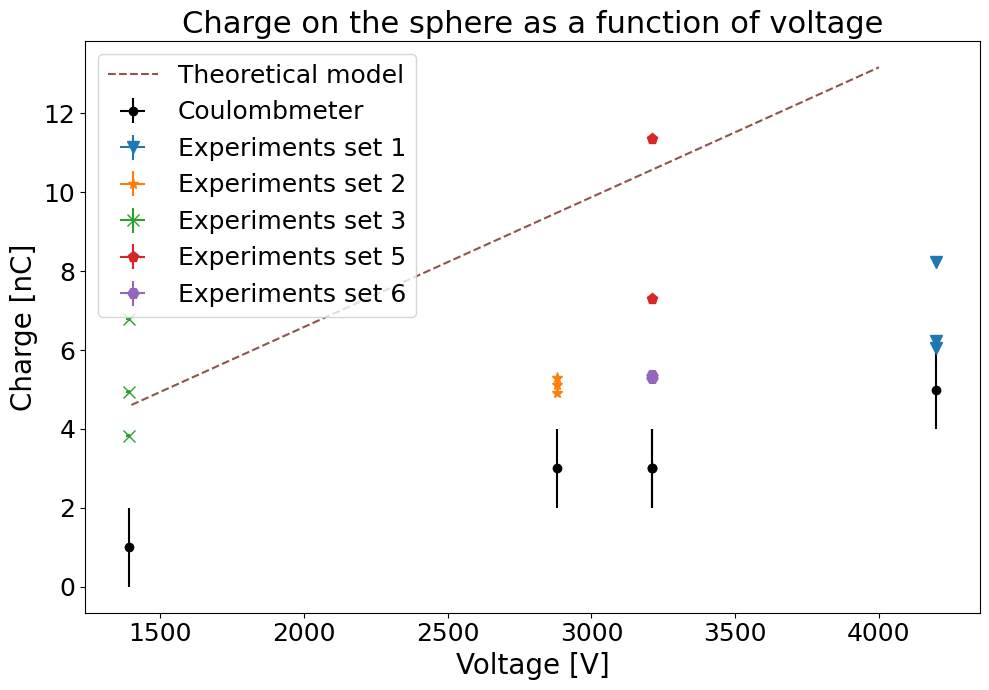

In [7]:
epsilon_nul = 8.85e-12
#de lading in experimenten 1-3,5-6
def fix_statfout(namen): #fixt data met enkel statfout
    waarden = [fitparamdict[naam][4][0] for naam in namen]
    return classes.datapunt(np.mean(waarden), np.sqrt(np.var(waarden)), q, 'N')
q1 = fix_statfout(['m1-1','m1-2','m1-3'])
q2 = fix_statfout(['m2-1','m2-2','m2-3'])
q3 = fix_statfout(['m3-1','m3-2','m3-3'])
q5 = fix_statfout(['m5-1','m5-2'])
q6 = fix_statfout(['m6-1','m6-2','m6-3'])
print('q1',q1)
print('q2',q2)
print('q3',q3)
print('q5',q5)
print('q6',q6)

namen_puntenwolk = ['m1-1','m1-2','m1-3'] + ['m2-1','m2-2','m2-3'] + ['m3-1','m3-2','m3-3'] + ['m5-1','m5-2'] + ['m6-1','m6-2','m6-3']
sets = [1, 2, 3, 5, 6]
spanningen_puntenwolk = np.array([4.20e3,4.20e3,4.20e3, 2.88e3,2.88e3,2.88e3, 1.39e3,1.39e3,1.39e3, 3.21e3, 3.21e3, 3.21e3, 3.21e3, 3.21e3])
ladingen_puntenwolk = [fitparamdict[naam][4][0]*10**9 for naam in namen_puntenwolk]
fouten_puntenwolk = [fitparamdict[naam][4][1]*10**9 for naam in namen_puntenwolk]

#checken of het overeenkomt met de waarde bepaald door de spanning
def check_data(lading, spanning):
    lading_voorspeld = spanning * 4*np.pi*epsilon_nul * 29.60e-3 
    print('voorspelde lading: ', lading_voorspeld, ', gefitte lading: ', lading)
    return functies.normaaltest(lading_voorspeld, functies.datapunt_to_vector(lading))

spanningen = np.array([4.20e3, 2.88e3, 1.39e3, 3.21e3, 3.21e3])
ladingen = [q1, q2, q3, q5, q6]
ladingwaarden = [lading.get_val() for lading in ladingen]
ladingwaarden_coulombmeter = [5, 3, 1, 3, 3]
ladingfouten_coulombmeter  = [1, 1, 1, 1, 1]
for indx in range(len(spanningen)):
    print(check_data(ladingen[indx], spanningen[indx]))

spanningspace = np.linspace(1400,4000)

fig, ax = plt.subplots(1,1, figsize = (10,7))
#ax.errorbar(spanningen, ladingwaarden, xerr = np.full(np.shape(spanningen), 0.01e3), yerr = [lading.get_fout() for lading in ladingen], fmt = 'o', label = 'Fitted')
ax.errorbar(spanningen, ladingwaarden_coulombmeter, xerr = np.full(np.shape(spanningen), 0.01e3), yerr = ladingfouten_coulombmeter, fmt = 'o', color = 'black', label = 'Coulombmeter')
grenzen = [(0,3), (3,6), (6,9), (9,11), (11,13)]
labels = ['Experiments set ' + str(set) for set in sets]
markerlijst = ['v', '*', 'x', 'p', 'H', 'o', '^']
for indx in range(len(grenzen)):
    onder, boven = grenzen[indx]
    ax.errorbar(spanningen_puntenwolk[onder:boven], ladingen_puntenwolk[onder:boven], xerr = np.full(np.shape(spanningen_puntenwolk[onder:boven]), 0.01e3),
                 yerr = fouten_puntenwolk[onder:boven], label = labels[indx], fmt = markerlijst[indx], markersize = 8)
ax.plot(spanningspace, spanningspace * 4*np.pi*epsilon_nul * 29.60e-3*10**9, linestyle = '--', label = 'Theoretical model')
ax.set_xlabel('Voltage [V]', fontsize = 20)
ax.set_ylabel('Charge [nC]', fontsize = 20)
ax.set_title('Charge on the sphere as a function of voltage', fontsize = 22)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
ax.legend(fontsize = 18)

plt.savefig('q_vs_V.png')
plt.tight_layout()
plt.show()

In [4]:
#testen of de frequentie wel klopt
L, omega = sp.symbols('L omega')
freqformule = classes.vergelijking(sp.sqrt(9.81/L), [L])
#de eerste reeks proeven
Kordelänge = classes.datapunt(0.66, 0.1, L, 'Uniform',)
freq1 = freqformule.evaluate([Kordelänge], None, omega)
print(freq1)
functies.normaaltest(np.sqrt(9.81/Kordelänge.get_val()), fitparamdict['m1-2'][4])

datapunt: omega = [3.85533868338910, 0.168627335353930, 'Normaal']


0.0

dict_keys(['m1-1', 'm1-2', 'm1-3', 'm2-1', 'm2-2', 'm2-3', 'm3-1', 'm3-2', 'm3-3', 'm5-1', 'm5-2', 'm6-1', 'm6-2', 'm6-3'])


<ErrorbarContainer object of 3 artists>

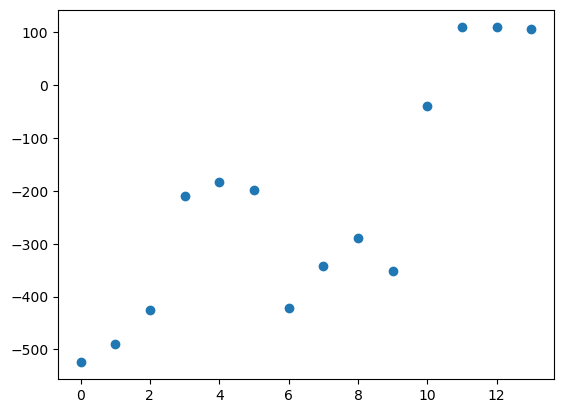

In [5]:
#eens de nulwaarden van het E-veld onderzoeken
constantes = []
errors = []
for experiment in experimenten:
    constantes.append(fitparamdict[experiment][2][0])
    fout = fitparamdict[experiment][2][1]
    if type(fout) == tuple:
        fout = (fout[1] + fout[0])/2
    errors.append(abs(fout))
fig, ax = plt.subplots(1,1)
print(experimenten)
ax.errorbar(range(len(constantes)), constantes, yerr = errors, linestyle = '', marker = 'o')